In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

0.8476477024070022
[[3099    0]
 [ 557    0]]


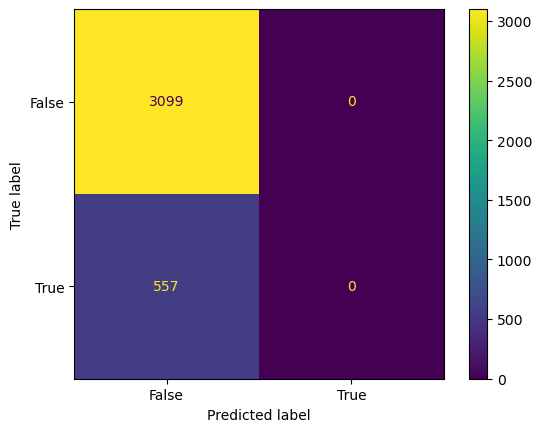

male                 [0.03846055]
age                  [0.53324303]
education            [-0.13752255]
currentSmoker        [-0.00622692]
cigsPerDay           [0.36212454]
BPMeds               [0.01575929]
prevalentStroke      [0.00434157]
prevalentHyp         [0.07975946]
diabetes             [0.01460548]
totChol              [-0.26945478]
sysBP                [0.52265982]
diaBP                [-0.62010523]
BMI                  [-0.38320367]
heartRate            [-0.7982582]
glucose              [0.1094951]
male  :  [-0.27220541]
age  :  [-0.03029977]
education  :  [-0.59528821]
currentSmoker  :  [-0.34454693]
cigsPerDay  :  [-0.03724374]
BPMeds  :  [-0.00503534]
prevalentStroke  :  [0.00011945]
prevalentHyp  :  [-0.13465747]
diabetes  :  [-0.00234067]
totChol  :  [-0.57604012]
sysBP  :  [-0.13608695]
diaBP  :  [-0.01449703]
BMI  :  [-0.0629663]
heartRate  :  [-0.0615375]
glucose  :  [-0.00861278]


In [3]:
data1 = pd.read_csv('framingham.csv')
data2 = data1.dropna()
r1, c1 = data1.shape
r, c = data2.shape

# print(r1, c1)
# print(r, c)

y = data2.pop('TenYearCHD').to_numpy().reshape(-1, 1)
x = data2.to_numpy()


def sigmoid(x) :
    return (1 / (1 + np.exp(-x)))
class Logistic:
    def __init__(self, r, c, base):
        self.row = r
        self.col = c
        self.base = base
    def train_data(self, x, y):
        self.x_train = np.append(x, np.ones((self.row, 1)), axis = 1)
        self.y_train = y
        self.w = np.zeros((self.col, 1))
    def predict(self):
        return sigmoid(self.x_train @ self.w)
    def loss(self):
        l = np.log(self.predict()).T @ self.y_train + (np.ones(self.row, 1) - self.y_train).T @ np.log(np.ones(self.row, 1) - self.predict())
    def gradient_descent(self, lr = 0.00005, iteration = 1000):
        for _ in range(iteration) :
            self.w -= lr * np.dot(self.x_train.T, (self.predict() - self.y_train)) / self.row
        return self.w
    def classify(self):
        pred = np.zeros((self.row, 1))
        for _ in range(self.row):
            if self.predict()[_] >= self.base:
                pred[_] = 1
        return pred
    def accuracy(self):
        # false = np.sum(abs(self.classify(0.5) - self.y_train))
        # print("Accuracy = ", 1 - false/self.row)
        # return 1 - false/self.row
        Acc = metrics.accuracy_score(self.y_train, self.classify())
        return Acc
    def confusion_matrix(self):
        confusion_matrix = metrics.confusion_matrix(self.y_train, self.classify())
        print(confusion_matrix)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
        cm_display.plot()
        plt.show()
    def graph(self):
        plt.scatter(self.x_train[:,0], self.y_train)



logistic = Logistic(r, c, 0.4)
logistic.train_data(x, y)
weight = logistic.gradient_descent(0.004, 1000)
print(logistic.accuracy())
logistic.confusion_matrix()

padding = ' ' * 25
for _ in range(c - 1):
    print('{:.20s} {}'.format(data2.keys()[_] + padding, weight[_]))


feature = Logistic(r, 2, 0.4)
for _ in range(c - 1):
    f = data2[data2.keys()[_]].to_numpy().reshape(-1, 1)
    feature.train_data(f, y)
    weight = feature.gradient_descent(0.004,1000)
    print(data2.keys()[_], " : ", weight[0])
